In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'inception_v3', pretrained=True)
model.eval()

In [ ]:

import torch
import torchvision

from torch import nn
from torchvision import transforms


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
train_dir=r'C:\Users\agnis\Downloads\DATASET\train'
test_dir =  r'C:\Users\agnis\Downloads\DATASET\test'
import numpy as np





In [ ]:
img_height, img_width = 299,299
train_transforms = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [ ]:
img_height, img_width = 2
transform = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
])

In [ ]:
import os

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()

def create_dataloaders(
    train_dir: str,
    test_dir: str,
    train_transform:transforms.Compose,
    test_transform:transforms.Compose,
    batch_size: int,
    num_workers: int=NUM_WORKERS

):

  # Use ImageFolder to create dataset(s)
  train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
  test_data = datasets.ImageFolder(test_dir, transform=test_transforms)

  # Get class names
  class_names = train_data.classes

  # Turn images into data loaders
  train_dataloader = DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      pin_memory=True,
  )
  test_dataloader = DataLoader(
      test_data,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
      pin_memory=True,
  )

  return train_dataloader, test_dataloader, class_names

In [ ]:
# Setup dataloaders
train_dataloader, test_dataloader, class_names = create_dataloaders(train_dir=train_dir,
                                                                                        test_dir=test_dir,
                                                                                                     train_transform=train_transforms,
                                                                                                     test_transform=test_transforms,
                                                                                                     batch_size=32)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from sklearn.metrics import precision_score, recall_score, f1_score



criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 10
for epoch in range(num_epochs):

    model.train()
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


    model.eval()
    correct = 0
    total = 0
    predicted_labels = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            predicted_labels.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    accuracy = correct / total

    # Calculate precision, recall, and F1 score
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    print(f"Epoch [{epoch+1}/{num_epochs}], Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


E:\Anaconda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
E:\Anaconda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/20], Train Loss: 0.6980289843152551, Test Loss: 0.5928364448065016, Test Accuracy: 0.8553191489361702, Precision: 0.8827675788925907, Recall: 0.8553191489361702, F1 Score: 0.8577950632433532
Epoch [2/20], Train Loss: 0.37224583985174403, Test Loss: 0.559409769376119, Test Accuracy: 0.8765957446808511, Precision: 0.9038920709279952, Recall: 0.8765957446808511, F1 Score: 0.8759497070559156
Epoch [3/20], Train Loss: 0.27959994434872093, Test Loss: 0.12287945953818659, Test Accuracy: 0.9468085106382979, Precision: 0.9497280477118887, Recall: 0.9468085106382979, F1 Score: 0.9471759385061933
Epoch [4/20], Train Loss: 0.1792891068274484, Test Loss: 0.25563377829579015, Test Accuracy: 0.9170212765957447, Precision: 0.931939875905638, Recall: 0.9170212765957447, F1 Score: 0.9124087315453637
Epoch [5/20], Train Loss: 0.17941999101244352, Test Loss: 0.31972723081707954, Test Accuracy: 0.8723404255319149, Precision: 0.9032502779022697, Recall: 0.8723404255319149, F1 Score: 0.8730317509876

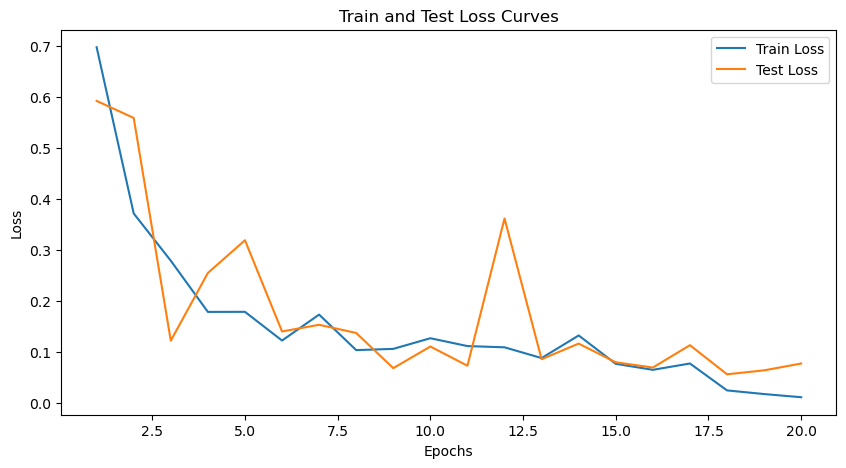

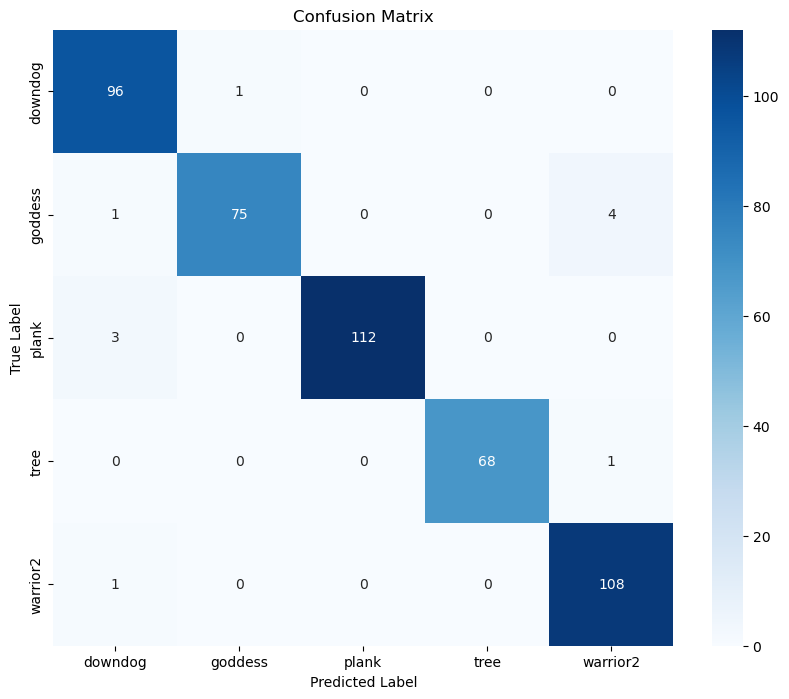

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define transformations
img_height, img_width = 299, 299
train_transforms = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
test_transforms = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

NUM_WORKERS = os.cpu_count()

def create_dataloaders(train_dir, test_dir, train_transform, test_transform, batch_size, num_workers=NUM_WORKERS):
    train_data = datasets.ImageFolder(train_dir, transform=train_transform)
    test_data = datasets.ImageFolder(test_dir, transform=test_transform)
    class_names = train_data.classes

    train_dataloader = DataLoader(
        train_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True
    )
    test_dataloader = DataLoader(
        test_data,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True
    )

    return train_dataloader, test_dataloader, class_names


train_dir = r'F:\ML_Projects\Image_Classification\niharika\DATASET\TRAIN'
test_dir = r'F:\ML_Projects\Image_Classification\niharika\DATASET\TEST'

train_dataloader, test_dataloader, class_names = create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    train_transform=train_transforms,
    test_transform=test_transforms,
    batch_size=32
)


model = models.inception_v3(pretrained=True, aux_logits=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(class_names))


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        if isinstance(outputs, tuple):
            outputs = outputs[0]  # use only the primary output
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_dataloader))

    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    predicted_labels = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            if isinstance(outputs, tuple):
                outputs = outputs[0]
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            predicted_labels.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    test_losses.append(test_loss / len(test_dataloader))

    accuracy = correct / total
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}, Test Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

# Plotting train and test loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss Curves')
plt.legend()
plt.show()

# Plotting confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
